# Final Project Report

* Class: DS 5100
* Student Name: Sam Knisely
* Student Net ID: sck4jh
* This URL: https://github.com/Sam-Knisely/sck4jh_ds5100_montecarlo/blob/main/montecarlo_demo.ipynb

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:https://github.com/Sam-Knisely/sck4jh_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```
# Monte Carlo Module

"""
Import pandas as pd and numpy as np for use throughout the module
"""

import pandas as pd
import numpy as np

class Die():
    """
    Required inputs: 
    - Number of faces of the die (data type = NumPy array)
    
    This class simulates die rolls. The class accepts the number of faces of the die as an input as a NumPy array in the 
    init chunk. The corresponding weights of each face can be adjusted if desired using the weight_update method. The 
    weights default to 1 if not updated. The roll method returns a list of outcomes and can be used to simulate
    as many rolls of the die as desired. The number of rolls defaults to 1. The die method returns the current state of 
    the die with the number of faces and corresponding weights. 
        """
    
    def __init__(self, faces):
        """
        Required inputs: 
        - Number of faces of the die (data type = NumPy array)
        
        This init chunk takes a NumPy array of faces as an argument and throws a `TypeError` if not a NumPy array. The 
        array’s data type `dtype` may be strings or numbers and will raise a `TypeError` if not. The array’s values have 
        to be distinct and raises a `ValueError` if not. The weights for each face are initialized as 1.0. The face values
        along with their corresponding weights are saved as the weighted_faces dataframe with faces as the index.

        """
        self.faces = faces
        if not isinstance(faces, np.ndarray):
            raise TypeError("The input for the amount of faces needs to be a NumPy array.")
        if not np.issubdtype(faces.dtype, np.number) and not np.issubdtype(faces.dtype, np.str_):
            raise TypeError("The input for the amount of faces needs to be either numbers or strings.")
        if not np.array_equal(np.unique(faces), faces):
            raise ValueError("The input for the amount of faces needs to be distinct (unique) values.")
        weights = np.ones(len(faces))
        self.weighted_faces = pd.DataFrame(data={"weights": weights}, index=faces)
                
    def weight_update(self, face_index, weight):
        """
        Required inputs: 
        - The face value to be changed (data type the same as given within the NumPy array, i.e. numeric or string)
        - The new weight for the given face (data type must be numeric or castable as numeric)
        
        This method can be used to update the weight associated with any face of the die.It takes two arguments, 
        the face value to be changed and the new weight. It checks to see if the face passed is valid value, i.e. if it 
        is in the die array. If not, raises an `IndexError`. It also checks to see if the weight is a valid type, i.e. if 
        it is numeric(integer or float) or castable as numeric. If not, raises a `TypeError`.
        """
        if face_index not in self.weighted_faces.index:
            raise IndexError("The given value for the face is not in the faces NumPy array.")
        try:
            weight = float(weight)
        except (TypeError, ValueError):
            raise TypeError("The weight data type must be either numeric or castable as a numeric.")
        self.weighted_faces["weights"][face_index] = weight
                
    def roll(self, rolls=1):
        """
        Optional inputs:
        - Number of rolls (input as an integer; default is to 1)
        
        Returns:
        - Outcomes of the rolls (as a list)
        
        This method simulates the die rolls and returns the outcomes as a list. It takes a parameter of how many times the 
        die is to be rolled; defaults to 1. This is essentially a random sample with replacement, from the private die 
        data frame, that applies the weights. It returns a Python list of outcomes and does not store internally these 
        results.
        """
        
        return [np.random.choice(self.weighted_faces.index, replace = True, 
                p = self.weighted_faces["weights"] / self.weighted_faces["weights"].sum()) for i in range(rolls)]

    def die(self): 
        """
        Returns:
        - The weighted_faces data frame.
        
        This method returns the current state of the die and its associated weights.
        """
        return self.weighted_faces
    
    
    
class Game():
    """
    Required inputs: 
    - A python list that contains one or more Die objects
    
    This class consists of rolling of one or more similar dice (Die objects) one or more times. By similar dice, we mean 
    that each die in a given game has the same number of sides and associated faces, but each die object may have its 
    own weights. Each game is initialized with a Python list that contains one or more dice. Game objects have a 
    behavior to play a game, i.e. to roll all of the dice a given number of times. Game objects only keep the results 
    of their most recent play.
    
    There is an init chunk, along with a play and recent_play method. The play method takes the dice, rolls them a given 
    amount of times, and saves the outcomes in Wide format. The recent_play method returns the play output in either 
    Wide or Narrow format, as specified with Wide being default.
    """

    def __init__(self, die_list):
        """
        Required inputs: 
        - A python list that contains one or more dice
    
        This init chunk requires a Python list of one or more dice to be input. It initializes this list for use throughout 
        the Game class.
        """
        self.die_list = die_list
        self.play_output = None
        
    def play(self, rolls):
        """
        Required inputs: 
        - The number of times the dice should be rolled (input as an integer)
    
        This play method takes an integer parameter to specify how many times the dice should be rolled. Saves the result 
        of the play to a private data frame. The data frame is in wide format, i.e. has the roll number is a named index 
        'Roll Number', the columns for each die number use its list index as the column name, and the face rolled is the 
        instance in each cell.
        """
        output = []
        for i in range(rolls):
            roll_output = []
            for i in self.die_list:
                r = i.roll()
                roll_output.append(r)
            output.append(roll_output)
        self.play_output = pd.DataFrame(output)
        self.play_output = self.play_output.applymap(lambda x: x[0])
        self.play_output.index.name = "Roll Number"
    def recent_play(self, form = "Wide"):
        """
        Required inputs: 
        - The form of the output dataframe (input as a string either 'Wide' or 'Narrow' ; default is 'Wide'
        
        This recent play method returns a copy of the private play data frame to the user. It takes a parameter to return 
        the data frame in narrow or wide form which defaults to wide form. The narrow form has a MultiIndex, comprising
        of the roll number and the die number (in that order), and a single column with the outcomes (i.e. the face rolled).
        This method raises a ValueError if the user passes an invalid option for narrow or wide.
        """
    
        if form == "Wide":
            return self.play_output
        elif form == "Narrow":
            self.play_output_narrow = pd.DataFrame(self.play_output.stack())
            self.play_output_narrow.index.names = ["Roll Number", "Die Number"]
            self.play_output_narrow.columns = ["Outcome"]
            return self.play_output_narrow
        else:
            raise ValueError("The input for the form of the output must be written as 'Wide' or 'Narrow'.")
            
            
class Analyzer():
    """
    Required inputs: 
    - A single Game object
    
    This class takes the results of a single game and computes various descriptive statistical properties about it.
    
    There is an init chunk, along with the jackpot, face_count, combo, and perm methods. The jackpot method returns 
    the amount of times a roll of the dice results in all of the same faces. The face_count method returns how many 
    times a given face is rolled in each event. The combo method returns the distinct combinations of faces rolled, 
    along with their counts. The perm method returns the distinct permutations of faces rolled, along with their counts.
    """
    
    def __init__(self, game_object):
        """
        Required inputs: 
        - A single Game object
        
        This init chunk takes a game object as its input parameter and throws a ValueError if the passed value is not 
        a Game object.
        """
        
        if not isinstance (game_object, Game):
            raise ValueError ("The input must be a Game object.")
        self.game_object = game_object

        
    def jackpot(self):
        """
        A jackpot is a result in which all faces are the same, e.g. all ones for a six-sided die. This jackpot method 
        computes how many times the game resulted in a jackpot. It returns an integer for the number of jackpots.
        """
        
        test_equal = self.game_object.play_output.nunique(axis=1) == 1
        jackpot_count = test_equal.sum()
        return jackpot_count
    
    def face_count(self):
        """
        This face_count method computes how many times a given face is rolled in each event. It returns a data frame 
        of results. The data frame has an index of the roll number, face values as columns, and count values in 
        the cells (i.e. it is in wide format).
        """
        
        dice_sides = self.game_object.die_list[0].faces
        value_counts = self.game_object.play_output.apply(lambda x: x.value_counts(dropna=False), axis=1)
        face_count_output = pd.DataFrame(value_counts, index=value_counts.index, columns=dice_sides)
        face_count_output.fillna(0, inplace=True)
        face_count_output = face_count_output.astype(int)
        return face_count_output
    
    def combo(self):
        """
        This combo method computes the distinct combinations of faces rolled, along with their counts. Combinations are 
        order-independent and may contain repetitions. It returns a data frame of results. The data frame has a MultiIndex 
        of distinct combinations and a column for the associated counts.
        """
        combos = self.game_object.play_output.apply(lambda x: tuple(sorted(x)), axis=1)
        value_counts_combos = pd.Series(combos).value_counts()
        combo_output = pd.DataFrame(value_counts_combos)
        combo_output.index = pd.MultiIndex.from_tuples(combo_output.index)
        return combo_output
    
    def perm(self):
        """
        This perm method computes the distinct permutations of faces rolled, along with their counts. Permutations are 
        order-dependent and may contain repetitions. It returns a data frame of results.The data frame has a MultiIndex of 
        distinct permutations and a column for the associated counts.
        """
        perms = self.game_object.play_output.apply(tuple, axis=1)
        perm_counts = pd.Series(perms).value_counts()
        perm_output = pd.DataFrame(perm_counts)
        perm_output.index = pd.MultiIndex.from_tuples(perm_counts.index)
        return perm_output
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import numpy as np
import pandas as pd
import unittest
from montecarlo import Die
from montecarlo import Game
from montecarlo import Analyzer

class MonteCarloTestSuite(unittest.TestCase):
    """
    Module to perform unit tests on the created methods from the montecarlo module. 
    """
    
    def test_1_Die_init(self): 
        """
        Create a Die object and test if weighted_faces is created as a DataFrame from the init chunk.
        """
        test1 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertEqual(type(test1.weighted_faces), pd.DataFrame)
        
    def test_2_Die_weight_update(self):
        """
        Tests the weight_update method of the Die class. Specifically, tests if the first value of the weights column in the weighted_faces DataFrame is numeric or castable as a numeric.
        """
        test2 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test2.weight_update(2, 100)
        self.assertTrue(isinstance(test2.weighted_faces["weights"].iloc[0],float))
        
    def test_3_Die_roll(self):
        """
        Tests the roll method of the Die class. Specifically, tests if a list is returned.
        """
        test3 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertTrue(isinstance(test3.roll(10), list))
    
    def test_4_Die_die(self):
        """
        Tests the die method of the Die class. Specifically, tests if the weights column is present in the returned DataFrame.
        """
        test4 = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertTrue("weights" in test4.die().columns)
    
    def test_5_Game_init(self):
        """
        Tests the init chunk of the Game class. Specifically, tests if the die_list is initialized and a list type.
        """
        test5 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test51 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list5 = [test5, test51]
        game_test5 = Game(die_list5)
        self.assertTrue(isinstance(game_test5.die_list, list))
        
    def test_6_Game_play(self):
        """
        Tests the play method of the Game class. Specifically, tests if the amount of rows in the play_output DataFrame is properly updated with the amount of rolls input to the play method (5 in the unittest example).
        """
        test6 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test61 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list6 = [test6, test61]
        game_test6 = Game(die_list6)
        game_test6.play(5)
        self.assertEqual(len(game_test6.play_output), 5)
        
    def test_7_Game_recent_play(self):
        """
        Tests the recent_play method of the Game class. Specifically, tests MultiIndex is present when Narrow is entered as the form parameter.
        """
        test7 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test71 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list7 = [test7, test71]
        game_test7 = Game(die_list7)
        game_test7.play(5)
        self.assertTrue(isinstance(game_test7.recent_play("Narrow").index, pd.MultiIndex))
        
    def test_8_Analyzer_init(self):
        """
        Tests the init chunk of the Analyzer class. Specifically, tests that the variable game_object is in fact a Game object from the Game class.
        """
        test8 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test81 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list8 = [test8, test81]
        game_test8 = Game(die_list8)
        game_test8.play(5)
        analyze8 = Analyzer(game_test8)
        self.assertTrue(isinstance(analyze8.game_object, Game))
        
    def test_9_1_Analyzer_jackpot(self):
        """
        Tests the jackpot method of the Analyzer class. Specifically, tests that method is returning an integer.
        """
        test9 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test91 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list9 = [test9, test91]
        game_test9 = Game(die_list9)
        game_test9.play(5)
        analyze9 = Analyzer(game_test9)
        self.assertTrue(isinstance(analyze9.jackpot(), np.int64))
        
    def test_9_2_Analyzer_face_count(self):
        """
        Tests the face_count method of the Analyzer class. Specifically, tests that number of columns in the returned DataFrame is equal to the number of faces on the input die.
        """
        test10 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test101 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list10 = [test10, test101]
        game_test10 = Game(die_list10)
        game_test10.play(5)
        analyze10 = Analyzer(game_test10)
        self.assertEqual(analyze10.face_count().shape[1], len(game_test10.die_list[0].faces))
        
    def test_9_3_Analyzer_combo(self):
        """
        Tests the combo method of the Analyzer class. Specifically, tests that returned DataFrame has a MultiIndex.
        """
        test11 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test111 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list11 = [test11, test111]
        game_test11 = Game(die_list11)
        game_test11.play(5)
        analyze11 = Analyzer(game_test11)
        self.assertTrue(isinstance(analyze11.combo().index, pd.MultiIndex))
        
    def test_9_4_Analyzer_perm(self):
        """
        Tests the perm method of the Analyzer class. Specifically, tests that column in the returned DataFrame is named count.
        """
        test12 = Die(np.array([1, 2, 3, 4, 5, 6]))
        test121 = Die(np.array([1, 2, 3, 4, 5, 6]))
        die_list12 = [test12, test121]
        game_test12 = Game(die_list12)
        game_test12.play(5)
        analyze12 = Analyzer(game_test12)
        self.assertEqual(analyze12.perm().columns[0], "count")
        
if __name__ == '__main__':
    
    unittest.main(verbosity=3)
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```
bash-4.4$ pwd
/sfs/qumulo/qhome/sck4jh/sck4jh_ds5100_montecarlo
bash-4.4$ cd ~/sck4jh_ds5100_montecarlo/montecarlo
bash-4.4$ python montecarlo_test.py
test_1_Die_init (__main__.MonteCarloTestSuite.test_1_Die_init)
Create a Die object and test if weighted_faces is created as a DataFrame from the init chunk. ... ok
test_2_Die_weight_update (__main__.MonteCarloTestSuite.test_2_Die_weight_update)
Tests the weight_update method of the Die class. Specifically, tests if the first value of the weights column in the weighted_faces DataFrame is numeric or castable as a numeric. ... ok
test_3_Die_roll (__main__.MonteCarloTestSuite.test_3_Die_roll)
Tests the roll method of the Die class. Specifically, tests if a list is returned. ... ok
test_4_Die_die (__main__.MonteCarloTestSuite.test_4_Die_die)
Tests the die method of the Die class. Specifically, tests if the weights column is present in the returned DataFrame. ... ok
test_5_Game_init (__main__.MonteCarloTestSuite.test_5_Game_init)
Tests the init chunk of the Game class. Specifically, tests if the die_list is initialized and a list type. ... ok
test_6_Game_play (__main__.MonteCarloTestSuite.test_6_Game_play)
Tests the play method of the Game class. Specifically, tests if the amount of rows in the play_output DataFrame is properly updated with the amount of rolls input to the play method (5 in the unittest example). ... ok
test_7_Game_recent_play (__main__.MonteCarloTestSuite.test_7_Game_recent_play)
Tests the recent_play method of the Game class. Specifically, tests MultiIndex is present when Narrow is entered as the form parameter. ... ok
test_8_Analyzer_init (__main__.MonteCarloTestSuite.test_8_Analyzer_init)
Tests the init chunk of the Analyzer class. Specifically, tests that the variable game_object is in fact a Game object from the Game class. ... ok
test_9_1_Analyzer_jackpot (__main__.MonteCarloTestSuite.test_9_1_Analyzer_jackpot)
Tests the jackpot method of the Analyzer class. Specifically, tests that method is returning an integer. ... ok
test_9_2_Analyzer_face_count (__main__.MonteCarloTestSuite.test_9_2_Analyzer_face_count)
Tests the face_count method of the Analyzer class. Specifically, tests that number of columns in the returned DataFrame is equal to the number of faces on the input die. ... ok
test_9_3_Analyzer_combo (__main__.MonteCarloTestSuite.test_9_3_Analyzer_combo)
Tests the combo method of the Analyzer class. Specifically, tests that returned DataFrame has a MultiIndex. ... ok
test_9_4_Analyzer_perm (__main__.MonteCarloTestSuite.test_9_4_Analyzer_perm)
Tests the perm method of the Analyzer class. Specifically, tests that column in the returned DataFrame is named count. ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.028s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
from montecarlo import montecarlo

Welcome to Sam Knisely's DS51000 Final Project!


## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [2]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo - Import pandas as pd and numpy as np for use throughout the module

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game_object)
     |  
     |  Required inputs: 
     |  - A single Game object
     |  
     |  This class takes the results of a single game and computes various descriptive statistical properties about it.
     |  
     |  There is an init chunk, along with the jackpot, face_count, combo, and perm methods. The jackpot method returns 
     |  the amount of times a roll of the dice results in all of the same faces. The face_count method returns how many 
     |  times a given face is rolled in each event. The combo method returns the distinct combinations of faces rolled, 
     |  along with their counts. The perm method returns the distinct permutations of faces rolled, along with their counts.
     |  
     

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/Sam-Knisely/sck4jh_ds5100_montecarlo?tab=readme-ov-file#sck4jh_ds5100_montecarlo

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [53]:
import numpy as np
import pandas as pd

#Numpy array with H and T
array = np.array(["H", "T"])

#Fair coin creation
fair = montecarlo.Die(array)

#Unfair coin creation
unfair = montecarlo.Die(array)
unfair.weight_update("H", 5)
unfair.die()

,weights
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [54]:
#Create fair game object with list of fair coin die objects
die_list_fair = [fair, fair]
fair_game = montecarlo.Game(die_list_fair)

#Call play method with 1000 flips
fair_game.play(1000)
fair_game.play_output

,0,1
Roll Number,,
0,H,H
1,T,T
2,H,H
3,T,H
4,T,T
...,...,...
995,T,T
996,H,H
997,H,H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [58]:
#Create game object with list of 2 unfair coins and 1 fair coin die objects
die_list_2unfair_1fair = [unfair, unfair, fair]
unfair_game = montecarlo.Game(die_list_2unfair_1fair)

#Call play method with 1000 flips
unfair_game.play(1000)
unfair_game.play_output

,0,1,2
Roll Number,,,
0,T,H,T
1,H,H,T
2,H,H,T
3,H,H,H
4,H,T,H
...,...,...,...
995,H,H,H
996,H,H,T
997,H,H,T


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [59]:
#Create fair game Analyzer object
fair_analyze = montecarlo.Analyzer(fair_game)

#Call jackpot method
fair_analyze.jackpot()

481

In [60]:
#Create unfair game Analyzer object
unfair_analyze = montecarlo.Analyzer(unfair_game)

#Call jackpot method
unfair_analyze.jackpot()

345

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [61]:
#Fair game jackpot relative frequency
fair_freq = fair_analyze.jackpot()/len(fair_game.play_output)
fair_freq

0.481

In [62]:
#Unfair game jackpot relative frequency
unfair_freq = unfair_analyze.jackpot()/len(unfair_game.play_output)
unfair_freq

0.345

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

(0.0, 1.0)

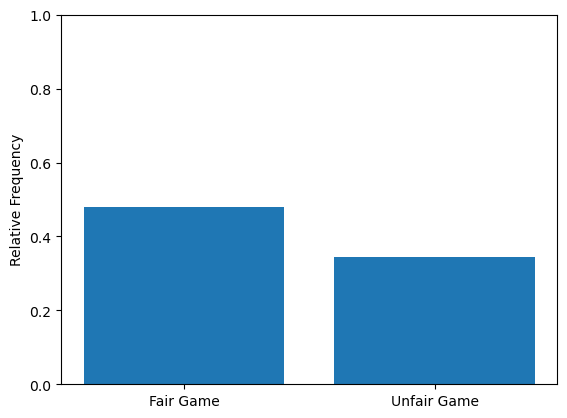

In [63]:
#Bar chart of relative frequencies
import matplotlib.pyplot as plot
freqs = list([fair_freq, unfair_freq])
plot.bar(["Fair Game", "Unfair Game"], freqs)
plot.ylabel("Relative Frequency")
plot.ylim(0,1)

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [64]:
#Numpy array with 1:6
dice_array = np.array([1, 2, 3, 4, 5, 6])

#Create 3 die objects with faces 1:6
Die1 = montecarlo.Die(dice_array)
Die2 = montecarlo.Die(dice_array)
Die3 = montecarlo.Die(dice_array)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [65]:
#Create unfair die with face 6 with a weight of 5
Die1.weight_update(6, 5)
Die1.die()

,weights
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [66]:
#Create unfair die with face 1 with a weight of 5
Die2.weight_update(1, 5)
Die2.die()

,weights
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [70]:
#Create game object with 5 fair dice
die_list_5fair = [Die3, Die3, Die3, Die3, Die3]
game_fair5 = montecarlo.Game(die_list_5fair)

#Call the play method with 10000 rolls
game_fair5.play(10000)
game_fair5.play_output

,0,1,2,3,4
Roll Number,,,,,
0,3,1,2,6,2
1,3,6,5,2,3
2,1,5,5,4,1
3,4,4,2,1,4
4,2,1,3,3,3
...,...,...,...,...,...
9995,6,2,3,2,6
9996,4,2,5,4,1
9997,5,2,5,1,5


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [87]:
#Create game object with 2 unfair dice and 3 fair dice
die_list_2unfair_3fair = [Die1, Die2, Die3, Die3, Die3]
game_2unfair_3fair = montecarlo.Game(die_list_2unfair_3fair)

#Call the play method with 10000 rolls
game_2unfair_3fair.play(10000)
game_2unfair_3fair.play_output

,0,1,2,3,4
Roll Number,,,,,
0,6,3,4,1,6
1,6,1,1,1,1
2,1,1,1,5,3
3,6,3,2,2,1
4,6,2,6,2,6
...,...,...,...,...,...
9995,3,3,2,3,5
9996,2,4,5,5,3
9997,6,1,4,3,6


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Text(0, 0.5, 'Relative Frequency')

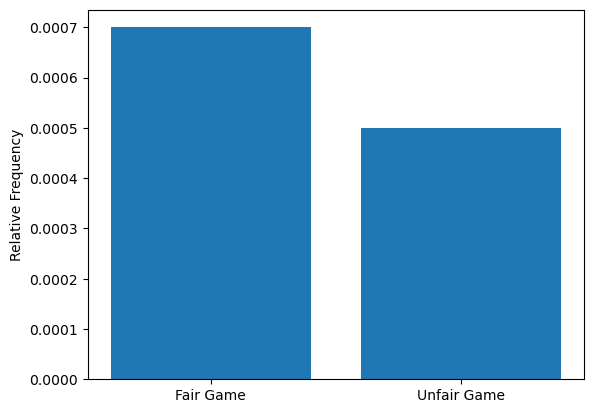

In [88]:
import matplotlib.pyplot as plot

#Create Analyzer objects for both game objects
fair_analyze5 = montecarlo.Analyzer(game_fair5)
unfair_analyze5 = montecarlo.Analyzer(game_2unfair_3fair)

#Create relative frequencies of jackpots
fair_freq5 = fair_analyze5.jackpot()/len(game_fair5.play_output)
unfair_freq5 = unfair_analyze5.jackpot()/len(game_2unfair_3fair.play_output)

#Plot relative frequencies in a bar chart
freqs2 = list([fair_freq5, unfair_freq5])
plot.bar(["Fair Game", "Unfair Game"], freqs2)
plot.ylabel("Relative Frequency")

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [89]:
#Read in english_letters txt file
letters = pd.read_table("english_letters.txt", header=None, delimiter = " ")
sorted_letters = \
letters.sort_values(by=letters.columns[0]).reset_index(drop=True)

#Create numpy array with letters from txt file
letters_array = np.array((sorted_letters[0])).astype('str')

#Create die object with letters
Die_Letters = montecarlo.Die(letters_array)

#Update weights with frequencies
for i in range(len(sorted_letters)):
    Die_Letters.weight_update(sorted_letters.iloc[i,0], \
                              sorted_letters.iloc[i,1])

Die_Letters.die()

,weights
A,374061888.0
B,70195826.0
C,138416451.0
D,169330528.0
E,529117365.0
F,95422055.0
G,91258980.0
H,216768975.0
I,320410057.0
J,9613410.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [90]:
#Create game object with 4 of the letters Die objects
die_list_letters = [Die_Letters, Die_Letters, Die_Letters, Die_Letters]
game_letters = montecarlo.Game(die_list_letters)

#Call the play method with 1000 rolls
game_letters.play(1000)
game_letters.play_output

,0,1,2,3
Roll Number,,,,
0,T,E,C,O
1,R,E,I,O
2,I,P,S,F
3,O,O,R,R
4,E,Y,D,A
...,...,...,...,...
995,S,O,D,I
996,A,L,E,L
997,H,E,F,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [91]:
#Create Analyzer object
letters_analyze = montecarlo.Analyzer(game_letters)

#Call permutations method
permutations = letters_analyze.perm()

#Read in scrabble_words txt file
scrabble = pd.read_table("scrabble_words.txt", header=None)

#Strings of permutations multiindex
perms2 = permutations.reset_index()
perms2["string_col"] = perms2["level_0"].astype(str)+ \
perms2["level_1"].astype(str)+ \
perms2["level_2"].astype(str)+perms2["level_3"].astype(str)

#Align column names
scrabble = scrabble.rename(columns={scrabble.columns[0]: "string_col"})

#Inner merge dataframes to get matches of vocabulary to permutations
matches = pd.merge(perms2, scrabble, on='string_col', how='inner')

#Len of matches df is count of vocab words from permutations method
len(matches)

56

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [92]:
#Create game object with 5 of the letters Die objects
die_list_letters5 = [Die_Letters, Die_Letters, Die_Letters, 
                     Die_Letters, Die_Letters]
game_letters5 = montecarlo.Game(die_list_letters5)

#Call the play method with 1000 rolls
game_letters5.play(1000)

#Create Analyzer object
letters_analyze5 = montecarlo.Analyzer(game_letters5)

#Call permutations method
permutations5 = letters_analyze5.perm()

#Strings of permutations multiindex
perms5 = permutations5.reset_index()
perms5["string_col"] = perms5["level_0"].astype(str)+ \
perms5["level_1"].astype(str)+ \
perms5["level_2"].astype(str)+perms5["level_3"].astype(str)+ \
perms5["level_4"].astype(str)

#Inner merge dataframes to get matches of vocabulary to permutations
matches5 = pd.merge(perms5, scrabble, on='string_col', how='inner')

#Len of matches df is count of vocab words from the permutations method
matches_count5 = len(matches5)

print("The 5 letter permutations method produces", matches_count5, \
      "actual words. " \
      "The 4 letter permutations method produces more actual words.")

The 5 letter permutations method produces 7 actual words. The 4 letter permutations method produces more actual words.


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.